In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_file = "/workspaces/Minerva-Discovery/my_experiments/sam_original/exec_experiments/results/experimento-parihaka_experiment_20241207_225230/experiment_log.csv"
df = pd.read_csv(log_file)
df.head()

,ratio,image_encoder_method,mask_decoder_method,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,fine_tuning,fine_tuning,tensor(0.5718),tensor(0.0294),1.125865,tensor(0.7235),tensor(0.9327),0.555298
1,0.01,fine_tuning,fine_tuning,tensor(1.1708),tensor(0.0741),1.349618,tensor(0.5303),tensor(0.8479),0.429990
2,0.01,fine_tuning,fine_tuning,tensor(0.7535),tensor(0.0318),1.176339,tensor(0.6627),tensor(0.9476),0.518062
3,0.01,fine_tuning,fine_tuning,tensor(0.4216),tensor(0.0280),0.797505,tensor(0.7343),tensor(0.9404),0.565495
4,0.01,fine_tuning,fine_tuning,tensor(0.9748),tensor(0.0742),1.157619,tensor(0.4965),tensor(0.8687),0.401157


In [3]:
df['ratio'] = pd.to_numeric(df['ratio'], errors='coerce') * 100
df['val_loss_epoch'] = df['val_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_loss_epoch'] = df['train_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_loss_epoch'] = df['test_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['val_mIoU'] = df['val_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_mIoU'] = df['train_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_mIoU'] = df['test_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)

In [4]:
df.head()

,ratio,image_encoder_method,mask_decoder_method,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,1.0,fine_tuning,fine_tuning,0.5718,0.0294,1.125865,0.7235,0.9327,0.555298
1,1.0,fine_tuning,fine_tuning,1.1708,0.0741,1.349618,0.5303,0.8479,0.429990
2,1.0,fine_tuning,fine_tuning,0.7535,0.0318,1.176339,0.6627,0.9476,0.518062
3,1.0,fine_tuning,fine_tuning,0.4216,0.0280,0.797505,0.7343,0.9404,0.565495
4,1.0,fine_tuning,fine_tuning,0.9748,0.0742,1.157619,0.4965,0.8687,0.401157


In [5]:
# Agrupamento com média e desvio padrão
grouped = df.groupby(['ratio', 'image_encoder_method', 'mask_decoder_method'], as_index=False).agg({
    'train_loss_epoch': ['mean', 'std'],
    'val_loss_epoch': ['mean', 'std'],
    'test_loss_epoch': ['mean', 'std'],
    'train_mIoU': ['mean', 'std'],
    'val_mIoU': ['mean', 'std'],
    'test_mIoU': ['mean', 'std'],
})

# Ajustando o DataFrame após o agrupamento
grouped.columns = ['ratio', 'image_encoder_method', 'mask_decoder_method',
                   'train_loss_mean', 'train_loss_std',
                   'val_loss_mean', 'val_loss_std',
                   'test_loss_mean', 'test_loss_std',
                   'train_mIoU_mean', 'train_mIoU_std',
                   'val_mIoU_mean', 'val_mIoU_std',
                   'test_mIoU_mean', 'test_mIoU_std',]

# Criando uma coluna que combina 'image_encoder_method' e 'mask_decoder_method'
grouped['method_combination'] = grouped['image_encoder_method'] + ' & ' + grouped['mask_decoder_method']

In [6]:
grouped

,ratio,image_encoder_method,mask_decoder_method,train_loss_mean,train_loss_std,val_loss_mean,val_loss_std,test_loss_mean,test_loss_std,train_mIoU_mean,train_mIoU_std,val_mIoU_mean,val_mIoU_std,test_mIoU_mean,test_mIoU_std,method_combination
0,1.0,adapter,adapter,1.92116,0.095244,1.96874,0.184111,2.036860,0.321153,0.07688,0.017184,0.08044,0.019325,0.069610,0.021028,adapter & adapter
1,1.0,adapter,fine_tuning,0.28108,0.050653,0.87018,0.286553,1.174725,0.307083,0.65872,0.021164,0.43042,0.081151,0.343569,0.049335,adapter & fine_tuning
2,1.0,adapter,freeze,1.92990,0.199640,2.02170,0.213833,1.921904,0.154917,0.05324,0.027514,0.04460,0.022760,0.051665,0.023763,adapter & freeze
3,1.0,fine_tuning,adapter,0.10092,0.020019,0.44788,0.178908,0.860227,0.249387,0.81314,0.029291,0.64108,0.051857,0.516327,0.057393,fine_tuning & adapter
4,1.0,fine_tuning,fine_tuning,0.04750,0.024366,0.77850,0.301314,1.121389,0.200837,0.90746,0.045780,0.62946,0.110058,0.494000,0.074439,fine_tuning & fine_tuning
5,1.0,fine_tuning,freeze,0.10108,0.004631,0.58890,0.233909,0.982197,0.303873,0.83946,0.036931,0.62508,0.077422,0.496508,0.064400,fine_tuning & freeze
6,1.0,freeze,adapter,1.95448,0.121994,1.90374,0.156639,1.860263,0.195306,0.05976,0.027592,0.07100,0.031427,0.073064,0.033636,freeze & adapter
7,1.0,freeze,fine_tuning,0.29578,0.019748,0.59338,0.194297,0.896024,0.160813,0.62454,0.021415,0.47930,0.055259,0.362958,0.028612,freeze & fine_tuning
8,100.0,adapter,adapter,0.15246,0.004059,0.20716,0.010290,0.428221,0.032538,0.75406,0.004188,0.68292,0.009985,0.567894,0.019030,adapter & adapter
9,100.0,adapter,fine_tuning,0.03374,0.000391,0.20542,0.072914,1.616713,0.277654,0.93742,0.001085,0.82278,0.027800,0.530273,0.023379,adapter & fine_tuning


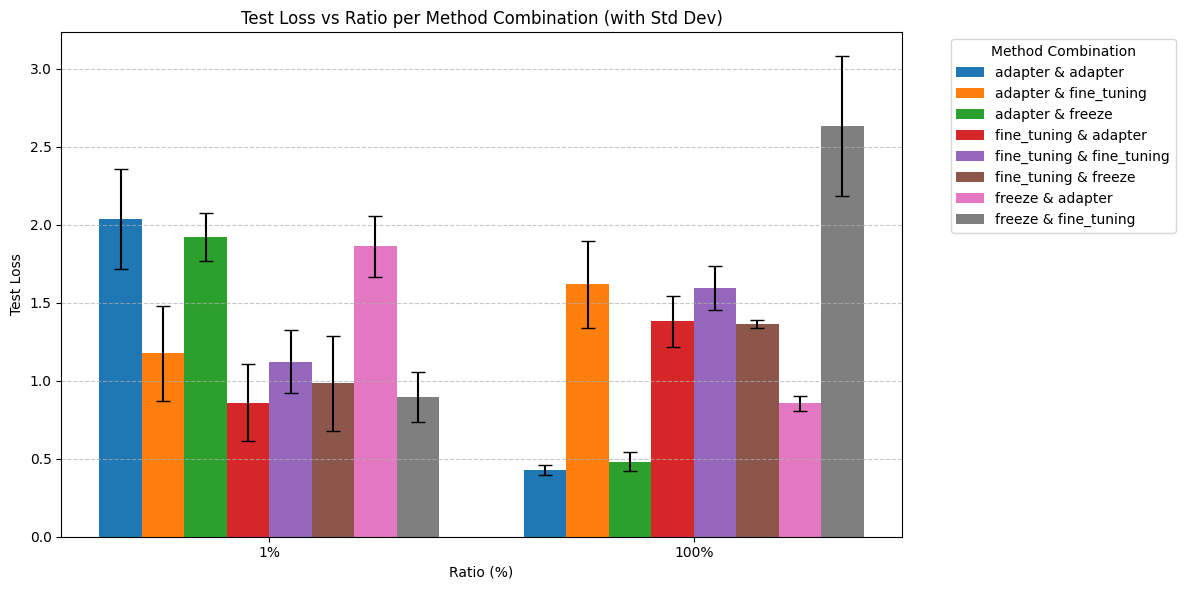

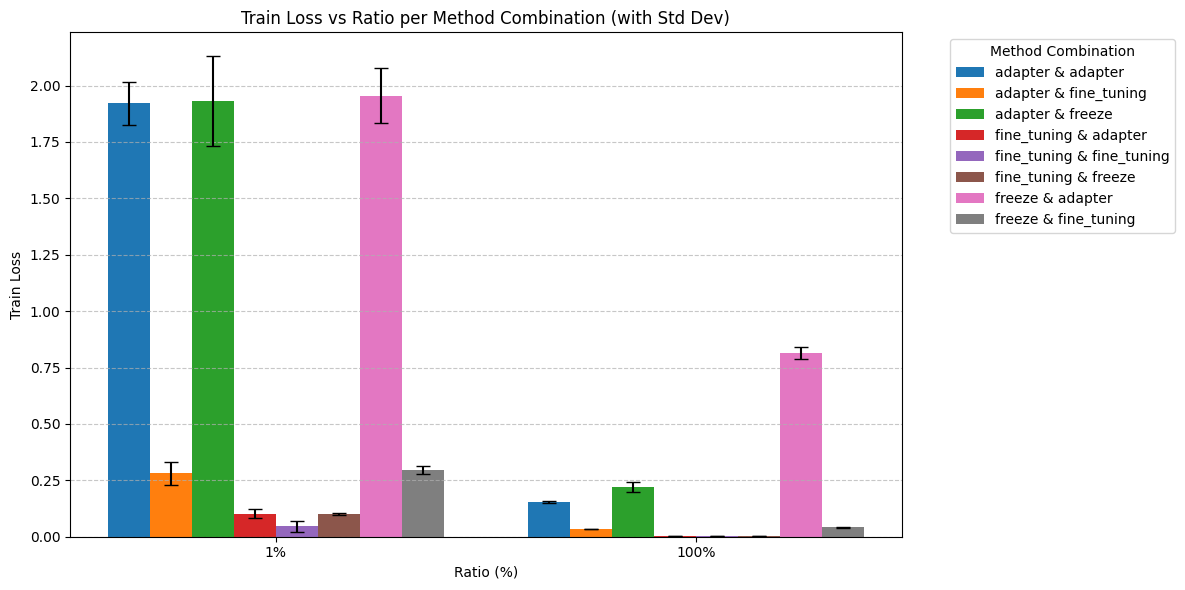

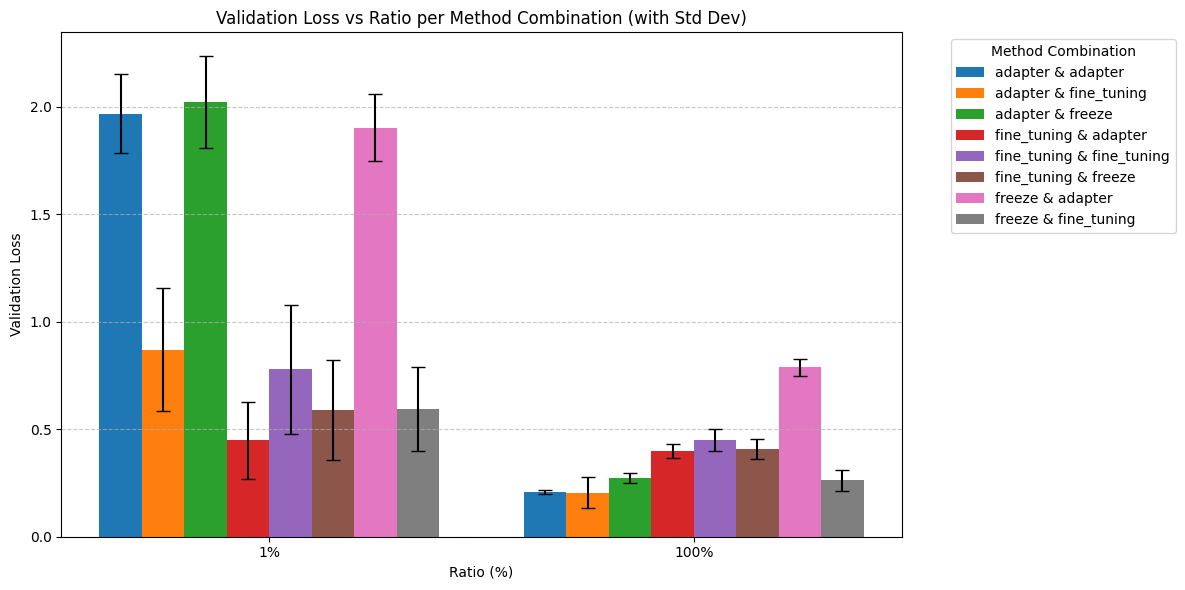

In [7]:
def plot_loss_with_std_matplotlib(data, loss_mean, loss_std, title, ylabel):
    plt.figure(figsize=(12, 6))

    # Preparando os dados
    ratios = sorted(data['ratio'].unique())  # Garantindo ordem dos ratios
    method_combinations = data['method_combination'].unique()

    bar_width = 0.15  # Largura das barras
    spacing = 0.3  # Espaçamento extra entre grupos
    x = np.arange(len(ratios)) * (len(method_combinations) * bar_width + spacing)  # Ajuste no espaçamento

    # Iterando sobre as combinações de métodos
    for i, method in enumerate(method_combinations):
        subset = data[data['method_combination'] == method]
        y_means = subset[loss_mean]
        y_stds = subset[loss_std]
        
        # Plotando as barras com erro
        plt.bar(x + i * bar_width, y_means, yerr=y_stds, capsize=5, width=bar_width, label=method)

    # Configurando os eixos e rótulos
    plt.xticks(x + (len(method_combinations) - 1) * bar_width / 2, [f"{int(r)}%" for r in ratios])
    plt.title(title)
    plt.xlabel('Ratio (%)')
    plt.ylabel(ylabel)
    plt.legend(title='Method Combination', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Gráfico de Test Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'test_loss_mean', 'test_loss_std',
                              'Test Loss vs Ratio per Method Combination (with Std Dev)', 'Test Loss')

# Gráfico de Train Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'train_loss_mean', 'train_loss_std',
                              'Train Loss vs Ratio per Method Combination (with Std Dev)', 'Train Loss')

# Gráfico de Validation Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'val_loss_mean', 'val_loss_std',
                              'Validation Loss vs Ratio per Method Combination (with Std Dev)', 'Validation Loss')

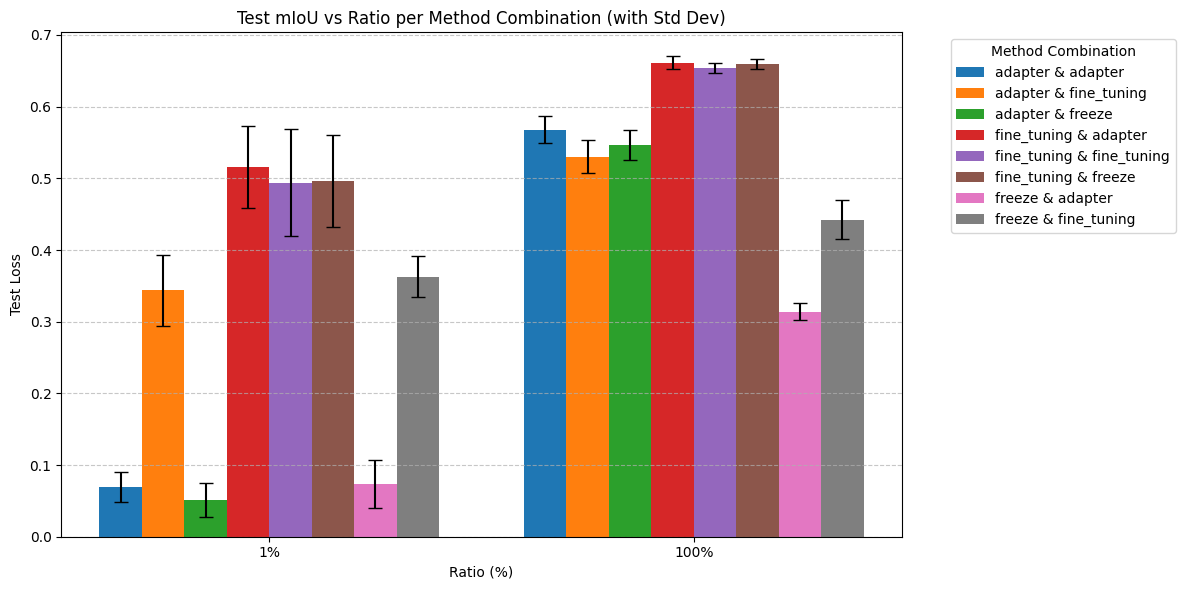

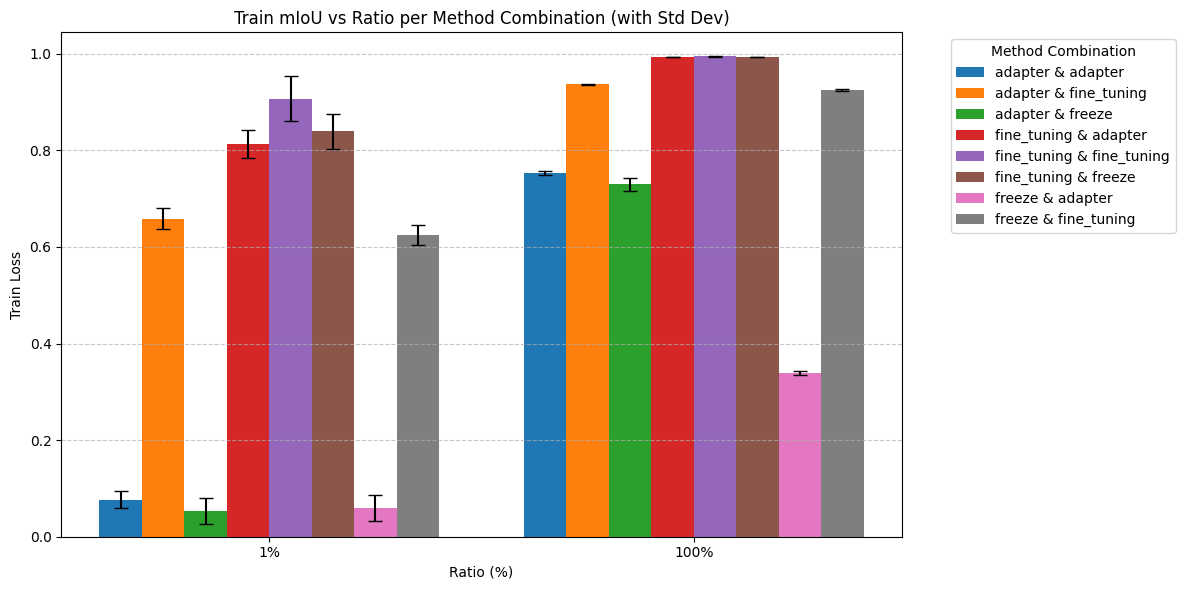

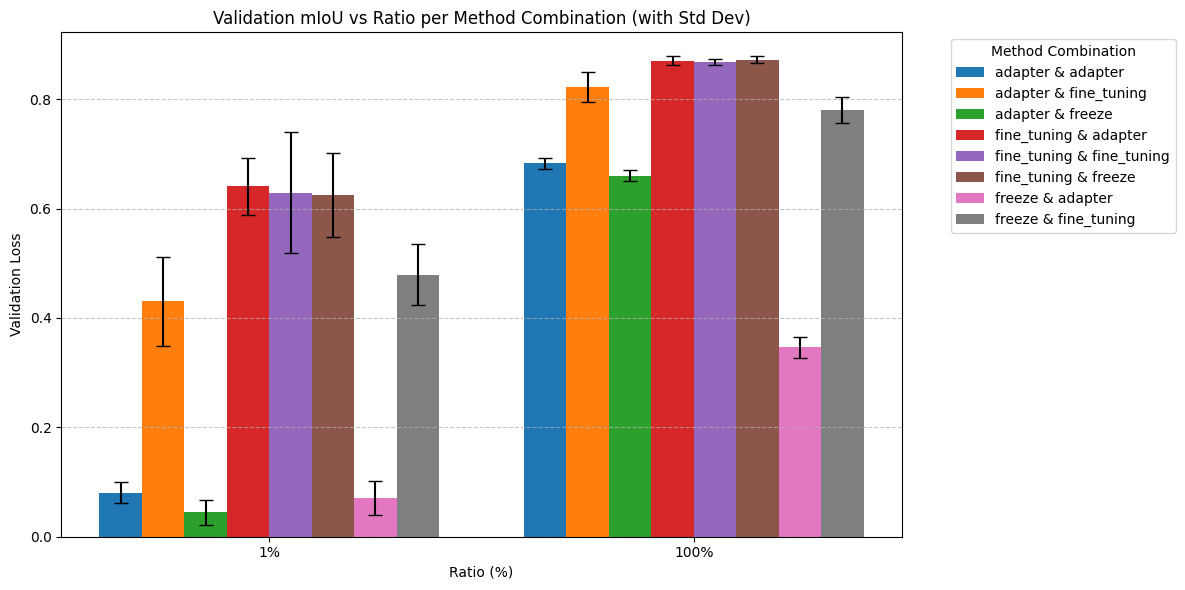

In [8]:
# Gráfico de Test Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'test_mIoU_mean', 'test_mIoU_std',
                              'Test mIoU vs Ratio per Method Combination (with Std Dev)', 'Test Loss')

# Gráfico de Train Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'train_mIoU_mean', 'train_mIoU_std',
                              'Train mIoU vs Ratio per Method Combination (with Std Dev)', 'Train Loss')

# Gráfico de Validation Loss com desvio padrão
plot_loss_with_std_matplotlib(grouped, 'val_mIoU_mean', 'val_mIoU_std',
                              'Validation mIoU vs Ratio per Method Combination (with Std Dev)', 'Validation Loss')